### 목차

- [<Step1.> : 문제정의 및 가설설정](#<Step1.>-:-문제정의-및-가설설정)
    - [문제정의]
    - [가설설정]
- [<Step2.> : 데이터 가공(수집 및 전처리)](#<Step2.>-:-데이터-가공)
    - [데이터 불러오기]
    - [데이터 결합]
    - [데이터 결측값 제거]
    - [데이터 구조 변경]
- [<Step3.> : 데이터 모델링 및 시각화](#<Step3.>-:-데이터-모델링-및-시각화)
    - [1. 아파트 매매가에 영향을 미치는 요인]
        - [1-1. 건물면적이 넓을수록 아파트 매매가도 높을 것이다 _ ([lmplot](https://seaborn.pydata.org/examples/multiple_regression.html))]
        - [1-2. 건축년도별로 아파트 매매가에 차이가 날 것이다 _ ([heatmap](https://seaborn.pydata.org/examples/spreadsheet_heatmap.html))]
        - [1-3. 지역구별로 아파트 매매가에 차이가 날 것이다 _ ([boxplot](https://seaborn.pydata.org/examples/grouped_boxplot.html) & [boxenplot](https://seaborn.pydata.org/examples/large_distributions.html))] 
    - [2. 연도별 아파트 건물면적과 층고]
        - [2-1. 건축년도가 최근일수록 건물면적이 좁을 것이다 _ ([pieplot](https://wikidocs.net/92114)) & plot]
        - [2-2. 건축년도가 최근일수록 층고가 높을 것이다 _ (plot)]

# <Step1.> : 문제정의 및 가설설정

## [문제정의]

 1. 아파트 매매가에 영향을 미치는 요인
 2. 연도별 아파트 건물면적과 층고
    
## [가설설정]
    
 1. 아파트 매매가에 영향을 미치는 요인
   * 1-1. 건물면적이 넓을수록 아파트 매매가도 높을 것이다.
   * 1-2. 건축년도별로 아파트 매매가에 차이가 날 것이다.
   * 1-3. 지역구별로 아파트 매매가에 차이가 날 것이다.
 2. 연도별 아파트 건물면적과 층고
   * 2-1. 건축년도가 최근일수록 건물면적이 좁을 것이다.
   * 2-2. 건축년도가 최근일수록 층고가 높을 것이다.

# <Step2.> : 데이터 가공

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

### 1. 법정동코드 가공

In [3]:
locCode = pd.read_excel('../data/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
locCode.shape

(20556, 7)

In [5]:
# 시도명 서울특별시 외에는 삭제
locCode.drop(locCode[locCode['시도명'] != '서울특별시'].index, inplace=True)
locCode.shape

(493, 7)

In [6]:
# 법정동 코드 컬럼에서 5자리 추출합니다.
# 예) 서울특별시 종로구 > 11000
locCode['지역코드'] = locCode['법정동코드'] // 100000
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN,11000
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN,11110
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110


In [7]:
# 불필요한 컬럼 제거
loc = locCode.drop(['법정동코드', '동리명', '생성일자', '말소일자'], axis=1)
loc.head()

,시도명,시군구명,읍면동명,지역코드
0,서울특별시,NaN,NaN,11000
1,서울특별시,종로구,NaN,11110
2,서울특별시,종로구,청운동,11110
3,서울특별시,종로구,신교동,11110
4,서울특별시,종로구,궁정동,11110


In [8]:
# 구와 동에서 NaN 값 제거
loc.dropna(inplace=True)
loc.head()

,시도명,시군구명,읍면동명,지역코드
2,서울특별시,종로구,청운동,11110
3,서울특별시,종로구,신교동,11110
4,서울특별시,종로구,궁정동,11110
5,서울특별시,종로구,효자동,11110
6,서울특별시,종로구,창성동,11110


### 2. 실거래가 데이터 가공

In [9]:
# 실거래가 데이터 불러오기
apt = pd.read_csv('../data/2020년 서울 아파트 실거래가.csv', encoding="cp949")
apt.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변


In [10]:
# 불러온 데이터에 NA값이 있는지 조회합니다.
apt.isna().sum()

법정동명           0
건물면적           0
층정보        12163
건물주용도코드        0
건물주용도          0
거래금액           0
건축년도         565
아파트명       12163
dtype: int64

In [11]:
apt.shape

(176001, 8)

In [12]:
# 건물주용도 컬럼 제거
apt.drop('건물주용도코드', axis=1, inplace=True)
apt.shape

(176001, 7)

In [13]:
# 건물주용도 아파트만 남기기
apt.drop(apt[apt['건물주용도'] != '아파트'].index, inplace=True)
apt.head()

,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,아파트,105000000,1994.0,궁전아트빌라
3,산천동,59.55,2.0,아파트,830000000,2001.0,리버힐삼성
4,이촌동,64.43,5.0,아파트,735000000,1971.0,강변


In [14]:
# 거래금액 억 단위로
apt['거래금액'] = apt['거래금액'] / 100000000
apt.head()

,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,아파트,7.49,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,아파트,12.00,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,아파트,1.05,1994.0,궁전아트빌라
3,산천동,59.55,2.0,아파트,8.30,2001.0,리버힐삼성
4,이촌동,64.43,5.0,아파트,7.35,1971.0,강변


In [15]:
# 건물면적 평 단위로
apt['건물면적'] = round(apt['건물면적'] * 0.3025)
apt.head()

,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
0,장위동,18.0,5.0,아파트,7.49,0.0,래미안 장위포레카운티
1,길음동,26.0,18.0,아파트,12.00,0.0,롯데캐슬 클라시아
2,구로동,11.0,1.0,아파트,1.05,1994.0,궁전아트빌라
3,산천동,18.0,2.0,아파트,8.30,2001.0,리버힐삼성
4,이촌동,19.0,5.0,아파트,7.35,1971.0,강변


In [16]:
# 변준영 아파트
# 건축년도 0 인 부분 삭제
bjy_apt = apt.drop(apt[apt['건축년도'] == 0].index)
bjy_apt.head()

,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
2,구로동,11.0,1.0,아파트,1.05,1994.0,궁전아트빌라
3,산천동,18.0,2.0,아파트,8.30,2001.0,리버힐삼성
4,이촌동,19.0,5.0,아파트,7.35,1971.0,강변
5,이태원동,32.0,9.0,아파트,14.30,1982.0,청화1
7,후암동,45.0,4.0,아파트,8.75,2002.0,힐튼빌리지2차


In [17]:
# 건축년도 0 -> 2000
apt['건축년도'].replace(0, 2000, inplace=True)
apt.head()

,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
0,장위동,18.0,5.0,아파트,7.49,2000.0,래미안 장위포레카운티
1,길음동,26.0,18.0,아파트,12.00,2000.0,롯데캐슬 클라시아
2,구로동,11.0,1.0,아파트,1.05,1994.0,궁전아트빌라
3,산천동,18.0,2.0,아파트,8.30,2001.0,리버힐삼성
4,이촌동,19.0,5.0,아파트,7.35,1971.0,강변


### 3. 데이터 프레임 결합

In [18]:
loc_apt = pd.merge(loc, apt, left_on='읍면동명', right_on='법정동명')
loc_apt

,시도명,시군구명,읍면동명,지역코드,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
0,서울특별시,종로구,청운동,11110,청운동,26.0,3.0,아파트,8.95,2000.0,청운현대
1,서울특별시,종로구,청운동,11110,청운동,26.0,3.0,아파트,8.50,2000.0,청운현대
2,서울특별시,종로구,신교동,11110,신교동,41.0,5.0,아파트,10.00,2002.0,신현(102동)
3,서울특별시,종로구,필운동,11110,필운동,33.0,7.0,아파트,9.40,2007.0,신동아블루아광화문의 꿈
4,서울특별시,종로구,필운동,11110,필운동,34.0,6.0,아파트,10.00,2007.0,신동아블루아광화문의 꿈
...,...,...,...,...,...,...,...,...,...,...,...
90661,서울특별시,강동구,강일동,11740,강일동,26.0,4.0,아파트,8.20,2009.0,강일리버파크6단지
90662,서울특별시,강동구,강일동,11740,강일동,26.0,10.0,아파트,7.90,2009.0,강일리버파크3단지
90663,서울특별시,강동구,강일동,11740,강일동,18.0,12.0,아파트,8.30,2009.0,강일리버파크3단지
90664,서울특별시,강동구,강일동,11740,강일동,18.0,13.0,아파트,7.60,2009.0,강일리버파크7단지


# <Step3.> : 데이터 모델링 및 시각화

## [1. 아파트 매매가에 영향을 미치는 요인]

### 1-1. 건물면적이 넓을수록 아파트 매매가도 높을 것이다. _ (lmplot)

In [19]:
lss_apt = apt.pivot_table('거래금액', '건물면적').reset_index()
lss_apt

,건물면적,거래금액
0,3.0,1.399400
1,4.0,1.409988
2,5.0,1.560451
3,6.0,2.037068
4,7.0,2.281165
...,...,...
75,79.0,27.865000
76,81.0,25.000000
77,82.0,67.000000
78,83.0,60.375000


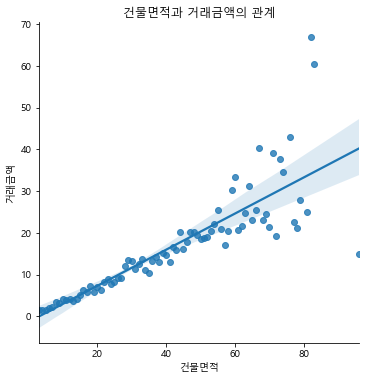

In [20]:
sns.lmplot(x='건물면적', y='거래금액', data=lss_apt)
plt.title("건물면적과 거래금액의 관계")
plt.show()

#### 분석결과  
    건물면적이 넓으면 아파트 매매가(거래금액)가 높을 것이라는 가설에 대해 확인했다.
    
    > 예측한대로 건물면적이 넓으면 아파트 매매가도 높다.

### 1-2. 건축년도별로 아파트 매매가에 차이가 날 것이다 _ (heatmap)

In [21]:
apt_old = loc_apt.replace(0, np.NaN)
apt_old=loc_apt.groupby(['건축년도','시군구명'])[['거래금액']].mean()
apt_old.reset_index(inplace=True)
apt_old

,건축년도,시군구명,거래금액
0,1961.0,구로구,1.715000
1,1965.0,중구,5.500000
2,1966.0,종로구,3.772000
3,1967.0,구로구,1.422500
4,1968.0,중구,2.321667
...,...,...,...
947,2020.0,영등포구,8.630852
948,2020.0,은평구,5.642625
949,2020.0,종로구,23.000000
950,2020.0,중구,2.400000


#### 최신 건물의 가격평균이 높은가격을 형성 할 것이라고 가정

In [22]:
old=pd.pivot_table(apt_old,index="건축년도",columns='시군구명', values="거래금액")
old

시군구명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
건축년도,,,,,,,,,,,,,,,,,,,,,
1961.0,NaN,NaN,NaN,NaN,NaN,NaN,1.715000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000,NaN
1966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.772000,NaN,NaN
1967.0,NaN,NaN,NaN,NaN,NaN,NaN,1.422500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.321667,NaN
1969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.116000,NaN,NaN,2.347500,4.619412,NaN,NaN,NaN,NaN
1970.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.772000,NaN,6.500000,5.365000,NaN
1971.0,NaN,NaN,NaN,NaN,2.187917,NaN,1.925000,NaN,NaN,NaN,...,NaN,1.974286,NaN,NaN,15.676935,14.701176,NaN,2.845000,3.325000,NaN
1972.0,NaN,NaN,NaN,NaN,NaN,NaN,1.848000,NaN,NaN,NaN,...,NaN,2.772000,NaN,NaN,2.050000,12.353725,1.822000,NaN,4.660000,NaN


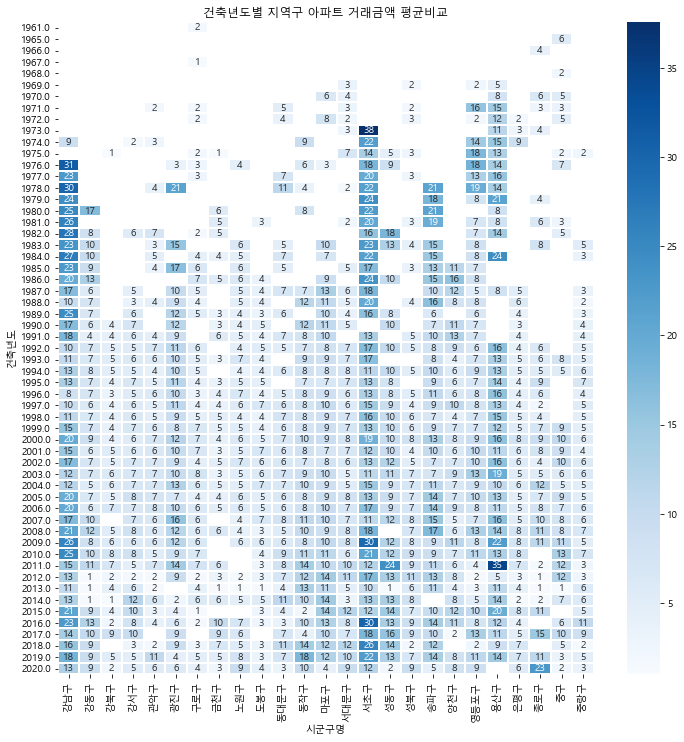

In [23]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(old,annot=True,fmt=".0f",linewidths=1,cmap='Blues')
plt.title('건축년도별 지역구 아파트 거래금액 평균비교')
plt.show()

#### 분석 1 : 최신 건물보다 오래된 건물의 가격대가 높은것을 확인
 - 강남구, 서초구의 경우 오래된 건물의 가격대가 재건축으로인한 가격 형성으로 예상
 - 용산구의 경우 특정 건축년도 건물의 가격대가 높은걸 확인하여 추가적인 분석 필요

In [24]:
loc_apt0 = loc_apt[loc_apt['시군구명']=='서초구']
loc_apt0_1 = loc_apt0.groupby(['건축년도','법정동명'])[['거래금액']].mean()
loc_apt0_1

거래금액
건축년도   법정동명           
1973.0 반포동   37.586389
1974.0 반포동   21.952895
1975.0 방배동   13.775200
1976.0 방배동   17.960625
1977.0 방배동   19.800000
...                ...
2019.0 잠원동   30.111111
2020.0 방배동   12.850000
       서초동    5.434417
       양재동    8.433333
       잠원동   26.383333

[142 rows x 1 columns]

In [25]:
loc_apt0_2=pd.pivot_table(loc_apt0_1,index="건축년도",columns='법정동명', values="거래금액")
loc_apt0_2

법정동명,내곡동,반포동,방배동,서초동,신원동,양재동,우면동,잠원동
건축년도,,,,,,,,
1973.0,NaN,37.586389,NaN,NaN,NaN,NaN,NaN,NaN
1974.0,NaN,21.952895,NaN,NaN,NaN,NaN,NaN,NaN
1975.0,NaN,NaN,13.775200,NaN,NaN,NaN,NaN,NaN
1976.0,NaN,NaN,17.960625,NaN,NaN,NaN,NaN,NaN
1977.0,NaN,NaN,19.800000,NaN,NaN,NaN,NaN,NaN
1978.0,NaN,29.348500,NaN,18.475714,NaN,NaN,NaN,23.159848
1979.0,NaN,NaN,NaN,21.020000,NaN,NaN,NaN,25.988889
1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.424286
1981.0,NaN,NaN,19.718182,NaN,NaN,NaN,NaN,20.396250


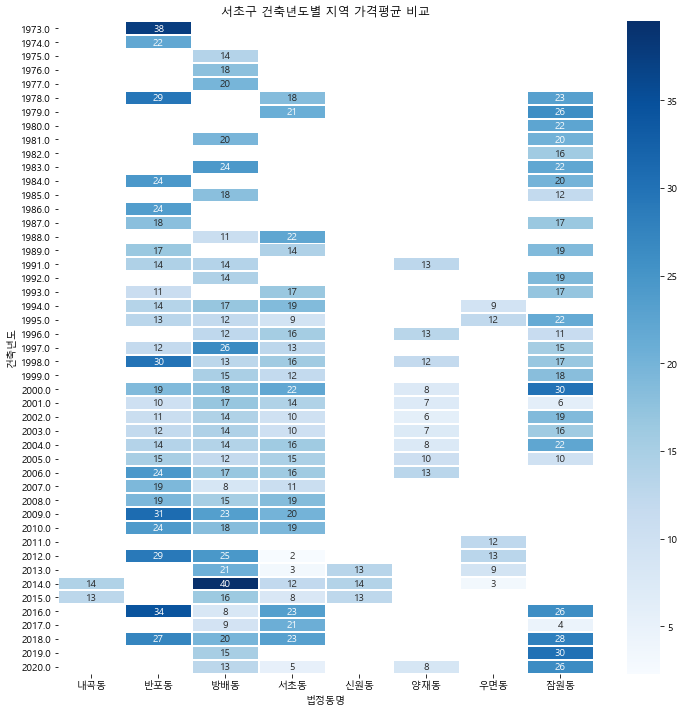

In [26]:
plt.figure(figsize=(12, 12))
sns.heatmap(loc_apt0_2,annot=True,fmt=".0f",linewidths=1,cmap='Blues')
plt.title('서초구 건축년도별 지역 가격평균 비교')
plt.show()

#### 분석 2 : 오래된 건물의 높은 가격형성의 이유를 재건축으로 예상, 표본으로 서초구 선별하여 동별 분석
 - 분석과 같이 반포동, 잠원동, 방배동의 경우 재건축으로 인한 높은 가격 형성을 확인 할 수 있었다. (사진첨부)
 
 (사진1:서초구 공동주택&재건축 정보포털)
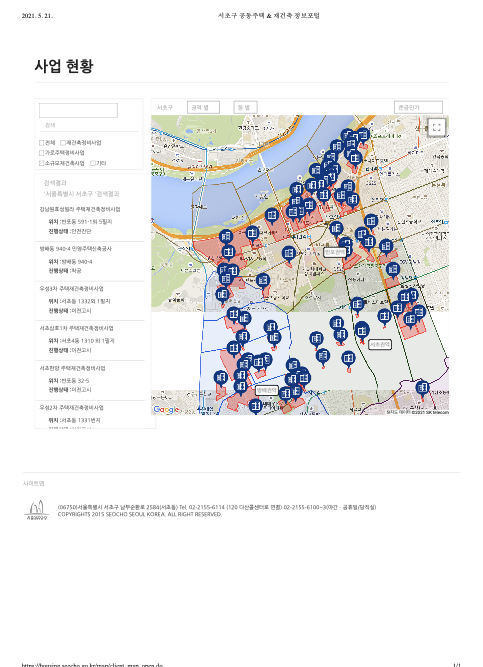

In [27]:
loc_apt1 = loc_apt[loc_apt['시군구명']=='용산구']
loc_apt1_1 = loc_apt1.groupby(['건축년도','법정동명'])[['거래금액']].mean()
loc_apt1_1

거래금액
건축년도   법정동명            
1969.0 동자동     4.898333
       이태원동    4.420000
       효창동     4.550000
1970.0 원효로2가   4.210000
       이촌동     8.800000
...                 ...
2017.0 한남동     8.238652
2018.0 문배동     4.592500
       원효로1가   4.400000
       효창동    14.260000
2019.0 효창동    14.456000

[127 rows x 1 columns]

In [28]:
loc_apt1_2=pd.pivot_table(loc_apt1_1,index="건축년도",columns='법정동명', values="거래금액")
loc_apt1_2

법정동명,갈월동,도원동,동빙고동,동자동,문배동,보광동,산천동,서빙고동,신계동,신창동,...,이태원동,청암동,청파동1가,청파동3가,한강로1가,한강로2가,한강로3가,한남동,효창동,후암동
건축년도,,,,,,,,,,,,,,,,,,,,,
1969.0,NaN,NaN,NaN,4.898333,NaN,NaN,NaN,NaN,NaN,NaN,...,4.420000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.550000,NaN
1970.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.833333,NaN,NaN,8.418750,NaN,NaN
1971.0,NaN,1.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.200000
1974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.894000,NaN,NaN
1975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.233333,NaN,NaN
1976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.396667,NaN,NaN
1977.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


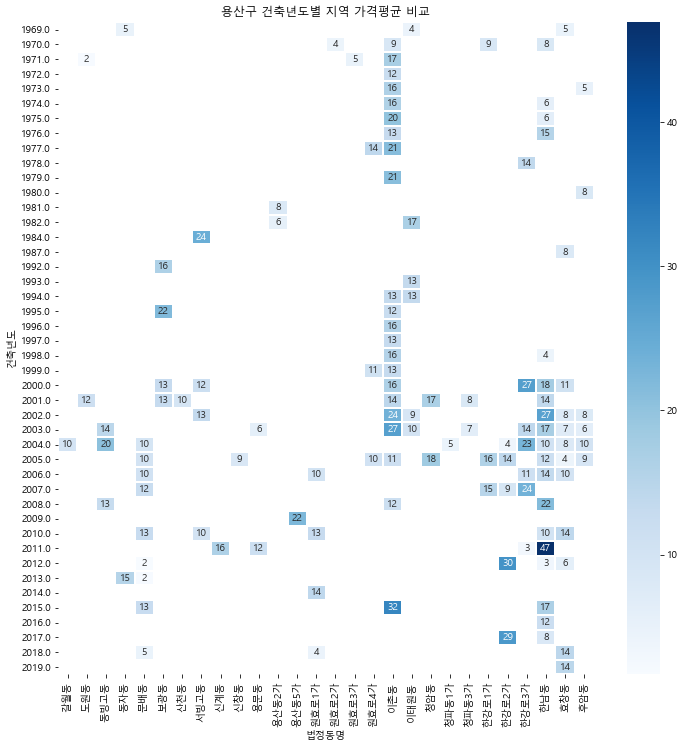

In [29]:
plt.figure(figsize=(12, 12))
sns.heatmap(loc_apt1_2,annot=True,fmt=".0f",linewidths=1,cmap='Blues')
plt.title('용산구 건축년도별 지역 가격평균 비교')
plt.show()

#### 분석 3 : 용산구의 경우 특정 건축년도 건물의 가격대가 높은걸 확인하여 추가적인 분석 실시
- 해당 특정 건축년도의 경우 한남동의 매물로 확인 자세한 분석이 필요함.

In [30]:
loc_apt2 = loc_apt[loc_apt['법정동명']=='한남동']
loc_apt2 

,시도명,시군구명,읍면동명,지역코드,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
3172,서울특별시,용산구,한남동,11170,한남동,26.0,1.0,아파트,11.00,2000.0,효성빌리지
3173,서울특별시,용산구,한남동,11170,한남동,69.0,5.0,아파트,24.40,2000.0,형우베스트빌3차
3174,서울특별시,용산구,한남동,11170,한남동,18.0,8.0,아파트,10.40,2004.0,한남동리첸시아
3175,서울특별시,용산구,한남동,11170,한남동,18.0,1.0,아파트,9.50,1970.0,시범
3176,서울특별시,용산구,한남동,11170,한남동,18.0,7.0,아파트,9.00,2001.0,리버탑
...,...,...,...,...,...,...,...,...,...,...,...
3358,서울특별시,용산구,한남동,11170,한남동,63.0,5.0,아파트,28.50,2003.0,힐탑트레져1동
3359,서울특별시,용산구,한남동,11170,한남동,53.0,15.0,아파트,16.50,2001.0,리버티하우스
3360,서울특별시,용산구,한남동,11170,한남동,14.0,5.0,아파트,8.80,2017.0,한남아이파크애비뉴
3361,서울특별시,용산구,한남동,11170,한남동,23.0,3.0,아파트,16.20,1976.0,장미1


In [31]:
loc_apt2_1 = loc_apt2 .groupby(['건물면적','아파트명'])[['거래금액']].mean()
loc_apt2_1

거래금액
건물면적 아파트명                       
5.0  윌쏘나슈트              2.819383
6.0  윌쏘나슈트              3.282050
7.0  윌쏘나슈트              3.928250
8.0  윌쏘나슈트              4.476800
9.0  한성1                3.885000
     현대안성타워             2.750000
10.0 윌쏘나슈트              5.406750
     한남동리첸시아            5.483333
     한성1                3.900000
11.0 한남동리첸시아            5.790000
12.0 현대안성타워             3.700000
14.0 성아1                4.150000
     한남동리첸시아            8.475000
     한남아이파크애비뉴          7.845000
15.0 한남아이파크애비뉴          8.491714
     현대안성타워             5.300000
16.0 장미1               12.990000
     한남동리첸시아            7.850000
18.0 리버탑                9.500000
     시범                 8.983333
     태성1                6.233333
     한남더힐              21.759091
     한남동동원베네스트          8.500000
     한남동리첸시아            9.966667
     한성1                7.000000
19.0 아일랜드캐슬             6.166667
20.0 한남해피트리            11.887500
21.0 시범                 9.300000
22.0 한남동리첸시아           10.705000
23.0 장미1               16.600000
25.0 오페라하우스3차           8.900000
     한남동동원베네스트         12.000000
26.0 대림아르빌             11.700000
     대성 이태리하우스         13.500000
     리버탑               11.725000
     한남힐스테이트           14.386667
     효성빌리지             12.950000
28.0 오페라하우스WEST        18.400000
35.0 한성1               10.800000
38.0 한남힐스테이트           17.000000
39.0 한남힐스테이트           18.987500
42.0 신성미소시티            13.500000
46.0 한남힐스테이트           21.000000
52.0 트윈빌 에이동           21.500000
53.0 리버티하우스            18.000000
54.0 한남더힐              41.700000
57.0 한남동UNVILLAGE루하우스  16.700000
60.0 현대하이페리온           26.633333
63.0 한남더힐              44.058333
     힐탑트레져1동           28.500000
68.0 현대하이페리온           31.300000
69.0 현대하이페리온II         34.300000
     형우베스트빌3차          22.700000
70.0 힐탑트레져1동           32.100000
71.0 한남더힐              51.221429
73.0 한남더힐              68.380000
74.0 한남더힐              77.500000

In [32]:
loc_apt2_2=pd.pivot_table(loc_apt2_1,index="건물면적",columns='아파트명', values="거래금액")
loc_apt2_2

아파트명,대림아르빌,대성 이태리하우스,리버탑,리버티하우스,성아1,시범,신성미소시티,아일랜드캐슬,오페라하우스3차,오페라하우스WEST,...,한남아이파크애비뉴,한남해피트리,한남힐스테이트,한성1,현대안성타워,현대하이페리온,현대하이페리온II,형우베스트빌3차,효성빌리지,힐탑트레져1동
건물면적,,,,,,,,,,,,,,,,,,,,,
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.885,2.75,NaN,NaN,NaN,NaN,NaN
10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.900,NaN,NaN,NaN,NaN,NaN,NaN
11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.70,NaN,NaN,NaN,NaN,NaN
14.0,NaN,NaN,NaN,NaN,4.15,NaN,NaN,NaN,NaN,NaN,...,7.845000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


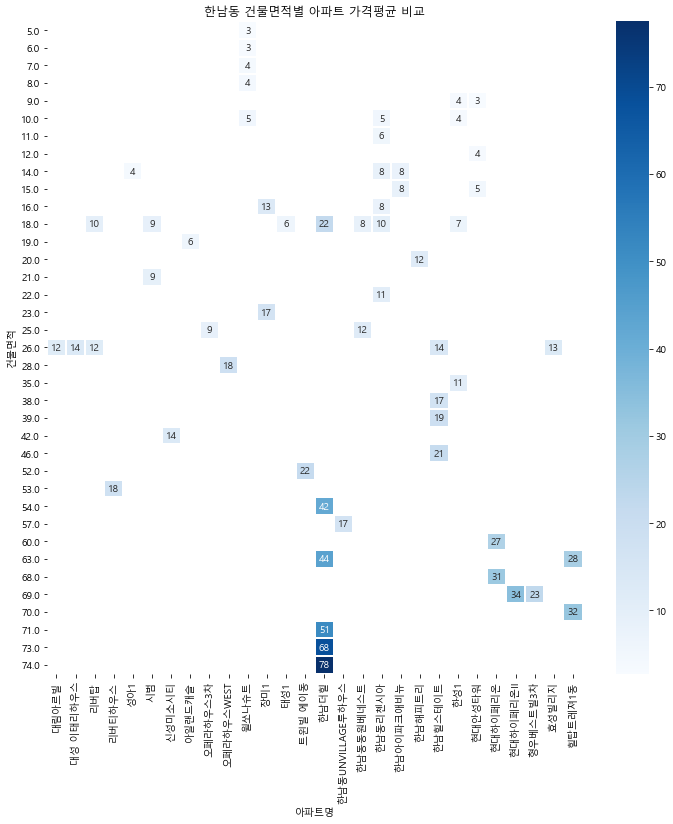

In [33]:
plt.figure(figsize=(12, 12))
sns.heatmap(loc_apt2_2,annot=True,fmt=".0f",linewidths=1,cmap='Blues')
plt.title('한남동 건물면적별 아파트 가격평균 비교')
plt.show()

#### 분석 4 : 용산구, 한남동의 특정 매물 분석
- 해당 매물의 경우 고가의 한남더 힐 가격으로 확인

### 1-3. 지역구별로 아파트 매매가에 차이가 날 것이다 _ (boxplot & boxenplot)

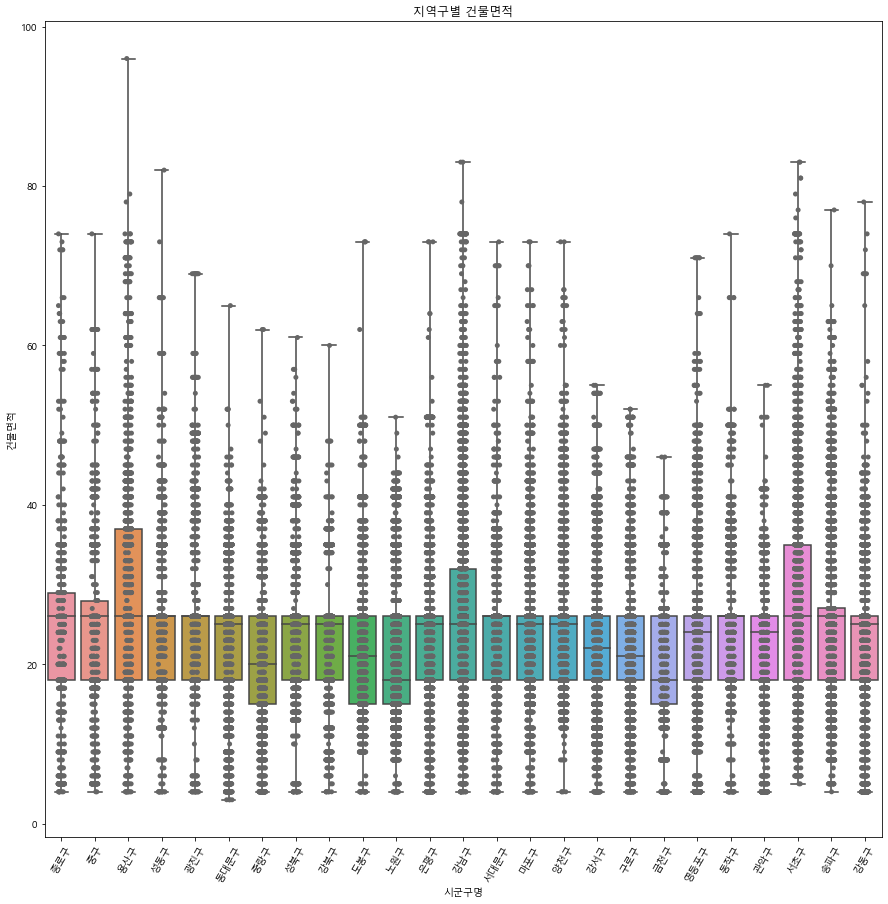

In [34]:
plt.figure(figsize=(15, 15))
plt.xticks(rotation=60)
plt.title('지역구별 건물면적')
sns.boxplot(x='시군구명', y='건물면적', data=loc_apt, whis=np.inf)
sns.stripplot(x='시군구명', y='건물면적', data=loc_apt, jitter=True, color="0.4")
plt.show()

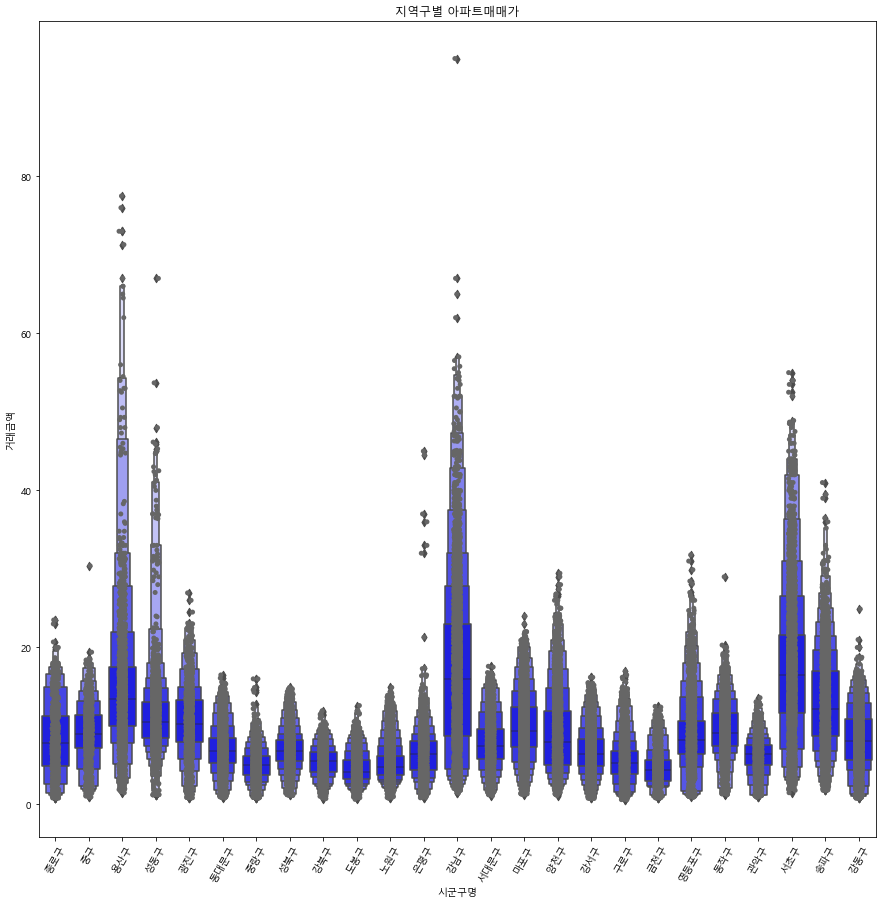

In [35]:
plt.figure(figsize=(15, 15))
plt.xticks(rotation=60)
plt.title('지역구별 아파트매매가')
sns.boxenplot(x="시군구명", y="거래금액",
              color="b",
              scale="linear", 
              data=loc_apt)
sns.stripplot(x='시군구명', y='거래금액', data=loc_apt, jitter=True, color="0.4")
plt.show()

In [36]:
loc_apt[loc_apt['거래금액'] > 50]

,시도명,시군구명,읍면동명,지역코드,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
3179,서울특별시,용산구,한남동,11170,한남동,71.0,6.0,아파트,56.00,2011.0,한남더힐
3185,서울특별시,용산구,한남동,11170,한남동,73.0,1.0,아파트,71.30,2011.0,한남더힐
3186,서울특별시,용산구,한남동,11170,한남동,73.0,3.0,아파트,62.00,2011.0,한남더힐
3220,서울특별시,용산구,한남동,11170,한남동,71.0,5.0,아파트,52.50,2011.0,한남더힐
3226,서울특별시,용산구,한남동,11170,한남동,73.0,5.0,아파트,66.00,2011.0,한남더힐
3227,서울특별시,용산구,한남동,11170,한남동,73.0,4.0,아파트,64.50,2011.0,한남더힐
3231,서울특별시,용산구,한남동,11170,한남동,73.0,-1.0,아파트,73.00,2011.0,한남더힐
3238,서울특별시,용산구,한남동,11170,한남동,71.0,8.0,아파트,53.00,2011.0,한남더힐
3252,서울특별시,용산구,한남동,11170,한남동,73.0,2.0,아파트,67.00,2011.0,한남더힐
3258,서울특별시,용산구,한남동,11170,한남동,71.0,6.0,아파트,52.70,2011.0,한남더힐


#### 분석결과  
    분명 지역구별로 아파트 매매가에 차이가 있는 것은 맞으나
    지역구 단위보다 더 세세하게 나눠야 할 필요가 있었다.
    
    > 분석결과 : 지역구별 아파트 매매가의 차이를 확인했다. barplot으로 봤을 때의 이상치는 아래와 같은 이유가 있었다.
      - 희소성이 강한 조망권 프리미엄의 이유로 서울에서 최고가에 거래된 아파트의 대부분이 한강변에 몰려있다.(서초구)
      - 강남은 기존의 입지와 학군지 진입 수요차이가 가장 높아 거래 가격이 높다.
      - 그 뒤로 용산구와 종로구는 서울의 중심과 같아서 어디로든 왕래가 편하고 유동인구가 많아 거래가격이 높다.
      - 역세권과 비역세권의 차이로 분양권 프리미엄이 크게 달라져 지역간의 가격차이가 크다.
      - 사업체가 많은 지역과 그렇지 않은 지역에서의 소득격차가 있기 때문에 아파트 매매가에도 영향을 미친다.
      - 서울 중심에 비해 외곽의 거래가는 상대적으로 낮음을 알 수 있다.

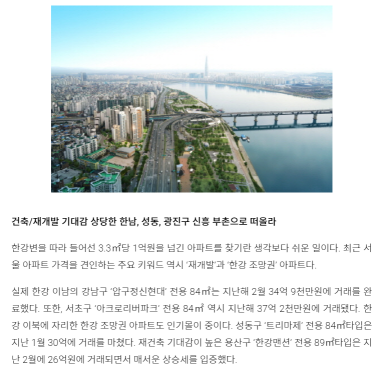
출처 : http://www.ksilbo.co.kr/news/articleView.html?idxno=900393

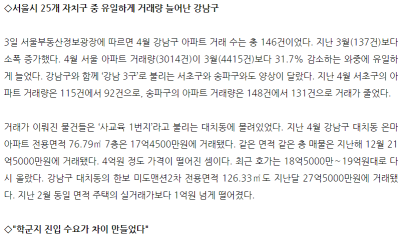
출처 : https://m.post.naver.com/viewer/postView.nhn?volumeNo=28439115&memberNo=28162671

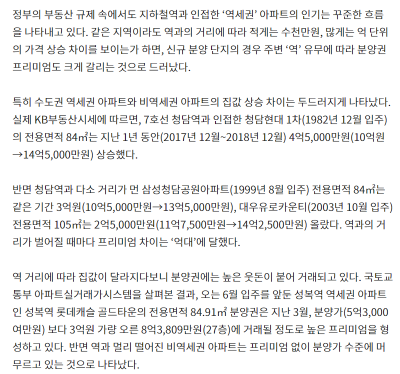출처 : https://www.sedaily.com/NewsVIew/1VJCTFCVKW

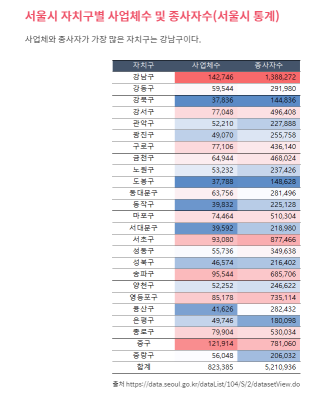
출처 : https://invisiblecity.tistory.com/1522

## 2. 연도별 아파트 건물면적과 층고

### 2-1. 건축년도가 최근일수록 건물면적이 좁을 것이다 _ (pieplot & plot)

#### 1, 2인 가구가 늘어나고 있음을 확인할 필요가 있어 외부 데이터를 가져왔다.

In [37]:
import pandas as pd
fam = pd.read_csv('../data/가구원수.txt', sep="\t", header=1)
fam

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2000,합계,"3,085,936","502,245","524,663","670,538","989,621","312,946","63,668","22,255",3.1
1,2000,종로구,"56,284","12,784","10,593","11,384","14,259","5,447","1,286",531,2.9
2,2000,중구,"44,461","10,353","8,562","9,119","11,116","4,173",839,299,2.9
3,2000,용산구,"74,981","15,233","14,824","16,127","19,781","6,969","1,458",589,2.9
4,2000,성동구,"102,285","17,205","18,657","22,370","30,598","10,238","2,364",853,3.1
...,...,...,...,...,...,...,...,...,...,...,...
203,2019,관악구,"242,154","119,863","55,423","34,875","24,563","5,806","1,283",341,2.0
204,2019,서초구,"155,377","42,667","38,892","35,327","29,850","6,704","1,503",434,2.5
205,2019,강남구,"206,524","66,073","51,560","43,435","35,800","7,671","1,564",421,2.4
206,2019,송파구,"252,212","68,861","65,402","57,821","47,607","10,014","2,038",469,2.5


In [38]:
fam = fam[fam['구분'] == '합계']
fam

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2000,합계,"3,085,936","502,245","524,663","670,538","989,621","312,946","63,668","22,255",3.1
26,2005,합계,"3,309,890","675,739","670,455","732,043","917,243","248,450","49,781","16,179",2.9
52,2010,합계,"3,504,297","854,606","781,527","788,115","807,836","209,061","47,659","15,493",2.7
78,2015,합계,"3,784,490","1,115,744","930,467","817,440","701,945","169,436","38,547","10,911",2.5
104,2016,합계,"3,784,705","1,138,860","931,262","816,946","686,469","163,555","37,153","10,460",2.5
130,2017,합계,"3,813,260","1,180,540","956,978","813,629","662,920","154,992","34,649","9,552",2.4
156,2018,합계,"3,839,766","1,229,421","977,469","807,545","637,385","147,231","32,059","8,656",2.4
182,2019,합계,"3,896,389","1,299,787","1,005,065","801,819","614,026","138,596","29,336","7,760",2.3


In [39]:
# 콤마 없애기
for i in range(2, 10):
    fam.iloc[:, i] = fam.iloc[:, i].str.replace(',', '').astype(int)
fam

C:\Users\oweny\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2000,합계,3085936,502245,524663,670538,989621,312946,63668,22255,3.1
26,2005,합계,3309890,675739,670455,732043,917243,248450,49781,16179,2.9
52,2010,합계,3504297,854606,781527,788115,807836,209061,47659,15493,2.7
78,2015,합계,3784490,1115744,930467,817440,701945,169436,38547,10911,2.5
104,2016,합계,3784705,1138860,931262,816946,686469,163555,37153,10460,2.5
130,2017,합계,3813260,1180540,956978,813629,662920,154992,34649,9552,2.4
156,2018,합계,3839766,1229421,977469,807545,637385,147231,32059,8656,2.4
182,2019,합계,3896389,1299787,1005065,801819,614026,138596,29336,7760,2.3


In [40]:
# 5인 이상으로 묶음
fam['5인 이상'] = fam[['5인', '6인', '7인 이상']].sum(axis=1)
fam

<ipython-input-40-5c44314aa91c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam['5인 이상'] = fam[['5인', '6인', '7인 이상']].sum(axis=1)


,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,5인 이상
0,2000,합계,3085936,502245,524663,670538,989621,312946,63668,22255,3.1,398869
26,2005,합계,3309890,675739,670455,732043,917243,248450,49781,16179,2.9,314410
52,2010,합계,3504297,854606,781527,788115,807836,209061,47659,15493,2.7,272213
78,2015,합계,3784490,1115744,930467,817440,701945,169436,38547,10911,2.5,218894
104,2016,합계,3784705,1138860,931262,816946,686469,163555,37153,10460,2.5,211168
130,2017,합계,3813260,1180540,956978,813629,662920,154992,34649,9552,2.4,199193
156,2018,합계,3839766,1229421,977469,807545,637385,147231,32059,8656,2.4,187946
182,2019,합계,3896389,1299787,1005065,801819,614026,138596,29336,7760,2.3,175692


In [41]:
# 묶은 나머지 컬럼 삭제
fam.drop(['5인', '6인', '7인 이상', '평균가구원수'], axis=1, inplace=True)
fam


C:\Users\oweny\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,기간,구분,일반가구수,1인,2인,3인,4인,5인 이상
0,2000,합계,3085936,502245,524663,670538,989621,398869
26,2005,합계,3309890,675739,670455,732043,917243,314410
52,2010,합계,3504297,854606,781527,788115,807836,272213
78,2015,합계,3784490,1115744,930467,817440,701945,218894
104,2016,합계,3784705,1138860,931262,816946,686469,211168
130,2017,합계,3813260,1180540,956978,813629,662920,199193
156,2018,합계,3839766,1229421,977469,807545,637385,187946
182,2019,합계,3896389,1299787,1005065,801819,614026,175692


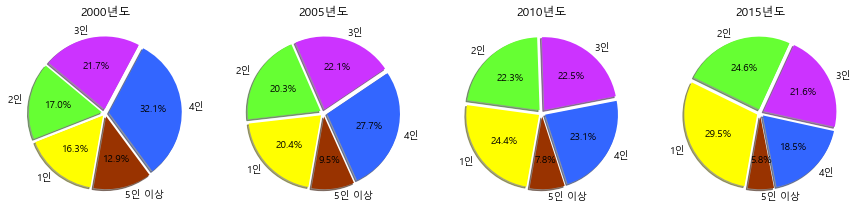

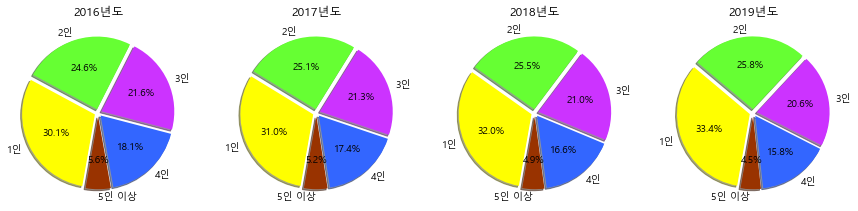

In [42]:
labels = fam.columns[3:8]
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ffff00', '#66ff33', '#cc33ff', '#3366ff', '#993300']

fig = plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(140 + i + 1)
    plt.title(str(fam.iat[i, 0]) + "년도")
    plt.pie(fam.iloc[i, 3:8], 
            labels=labels, 
            autopct='%.1f%%', 
            startangle=260, 
            counterclock=False, 
            explode=explode, 
            shadow=True, 
            colors=colors)    

plt.show()

fig = plt.figure(figsize=(15, 10))
for i in range(4, 8):
    plt.subplot(240 + i - 3)
    plt.title(str(fam.iat[i, 0]) + "년도")
    plt.pie(fam.iloc[i, 3:8], 
            labels=labels, 
            autopct='%.1f%%', 
            startangle=260, 
            counterclock=False, 
            explode=explode, 
            shadow=True, 
            colors=colors)     

plt.show()


#### 분석결과
    시간이 지남에 따라 1,2인 가구는 점점 늘고, 4인 이상 가구는 점점 줄어드는 것을 확인 할 수 있다.

#### 위 결과로 미루어 봤을 때 오래된 아파트일수록 면적이 넓을 것으로 예상했다.

In [43]:
# 년도별 평균 건물면적
df2_1 = bjy_apt.groupby(['건축년도'])[['건물면적']].mean() 
df2_1.head()

,건물면적
건축년도,
1961.0,15.444444
1965.0,14.000000
1966.0,9.000000
1967.0,16.000000
1968.0,13.666667


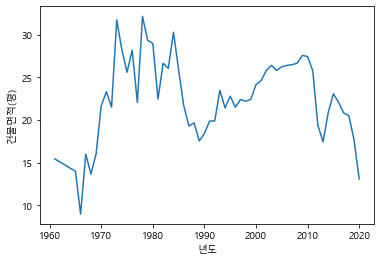

In [44]:
# 서울 전지역 년도별 건물면적
plt.plot(df2_1)
plt.xlabel('년도')
plt.ylabel('건물면적(평)')
plt.show()

#### 분석결과
    상관관계 파악이 어렵지만 가구원수가 급격히 줄어든 게 건물면적에 분명한 영향을 끼쳤음을 알 수 있다.
    
    > 2000~2020년도의 데이터를 봤을 때 1, 2인 가구가 급격히 늘어난 최근에 들어서는 건물면적이 줄어드는 것을 확인할 수 있다.

### 2-2. 건축년도가 최근일수록 층고가 높을 것이다 _ (plot)

In [45]:
df3_1 = bjy_apt.groupby(['건축년도'])[['층정보']].mean() 
df3_1.head()

,층정보
건축년도,
1961.0,3.555556
1965.0,4.000000
1966.0,3.400000
1967.0,1.000000
1968.0,7.888889


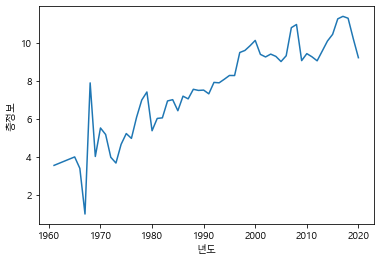

In [46]:
plt.plot(df3_1)
plt.xlabel('년도')
plt.ylabel('층정보')
plt.show()

#### 분석결과
     최신 아파트일수록 층수가 높아지는 것을 확인 할 수있다.